In [1]:
# Updating fastai
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# Save path for projects
root_path = 'gdrive/My Drive/Projects/'

In [0]:
# Making a folder for the dog images named 'dogs' 
#(Path(root_path)/'dogs').mkdir(parents=True, exist_ok=True)

In [0]:
# Save path for folder that contains images of the dogs
proj_path = 'gdrive/My Drive/Projects/dogs/'

In [0]:
# Saving the path
p_path = Path(proj_path)

In [0]:
# Common data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
# Importing files from google drive
from google.colab import drive

In [0]:
from fastai.vision import *

In [0]:
# Connecting workbook to google drive folder with the images
drive.mount('/content/gdrive')

In [0]:
# Creating an 80/20 training and testing data split
np.random.seed(50)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# Data variable has taken in all of the classes from our folder structure
data.classes

In [0]:
# Check a sample of images
data.show_batch(rows = 3, figsize = (11,11))

In [0]:
# Check all of the classes. 16,464 images in the training set, and 4,116 in the test set
data.classes, data.x, len(data.train_ds), len(data.valid_ds) 

In [0]:
# Creating a cnn_learner object and running it through a pre-existing model which is a good image classyifying neural net (resnet34)
# error_rate is 1 minus the accuracy
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [36]:
# Train 8 epochs of the model
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.002390,0.731354,0.213800,25:19
1,1.066191,0.591310,0.186346,03:54
2,0.892223,0.564132,0.174198,03:52
3,0.763295,0.507001,0.157677,03:59
4,0.673687,0.475750,0.151361,03:57
5,0.569049,0.440381,0.140185,03:55
6,0.490892,0.419925,0.136783,03:53
7,0.422020,0.415236,0.134354,03:52


In [37]:
# Saving the model
learn.save('model1', return_path = True)

PosixPath('gdrive/My Drive/Projects/dogs/models/model1.pth')

In [0]:
# Allows us to retrain the whole model pipeline to see if we can do better than the error rate of 
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


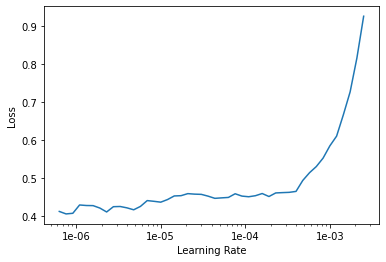

In [40]:
# Trying to find the optimal learning rates
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('model2')

In [69]:
learn.load('model1')
interpret = ClassificationInterpretation.from_learner(learn)

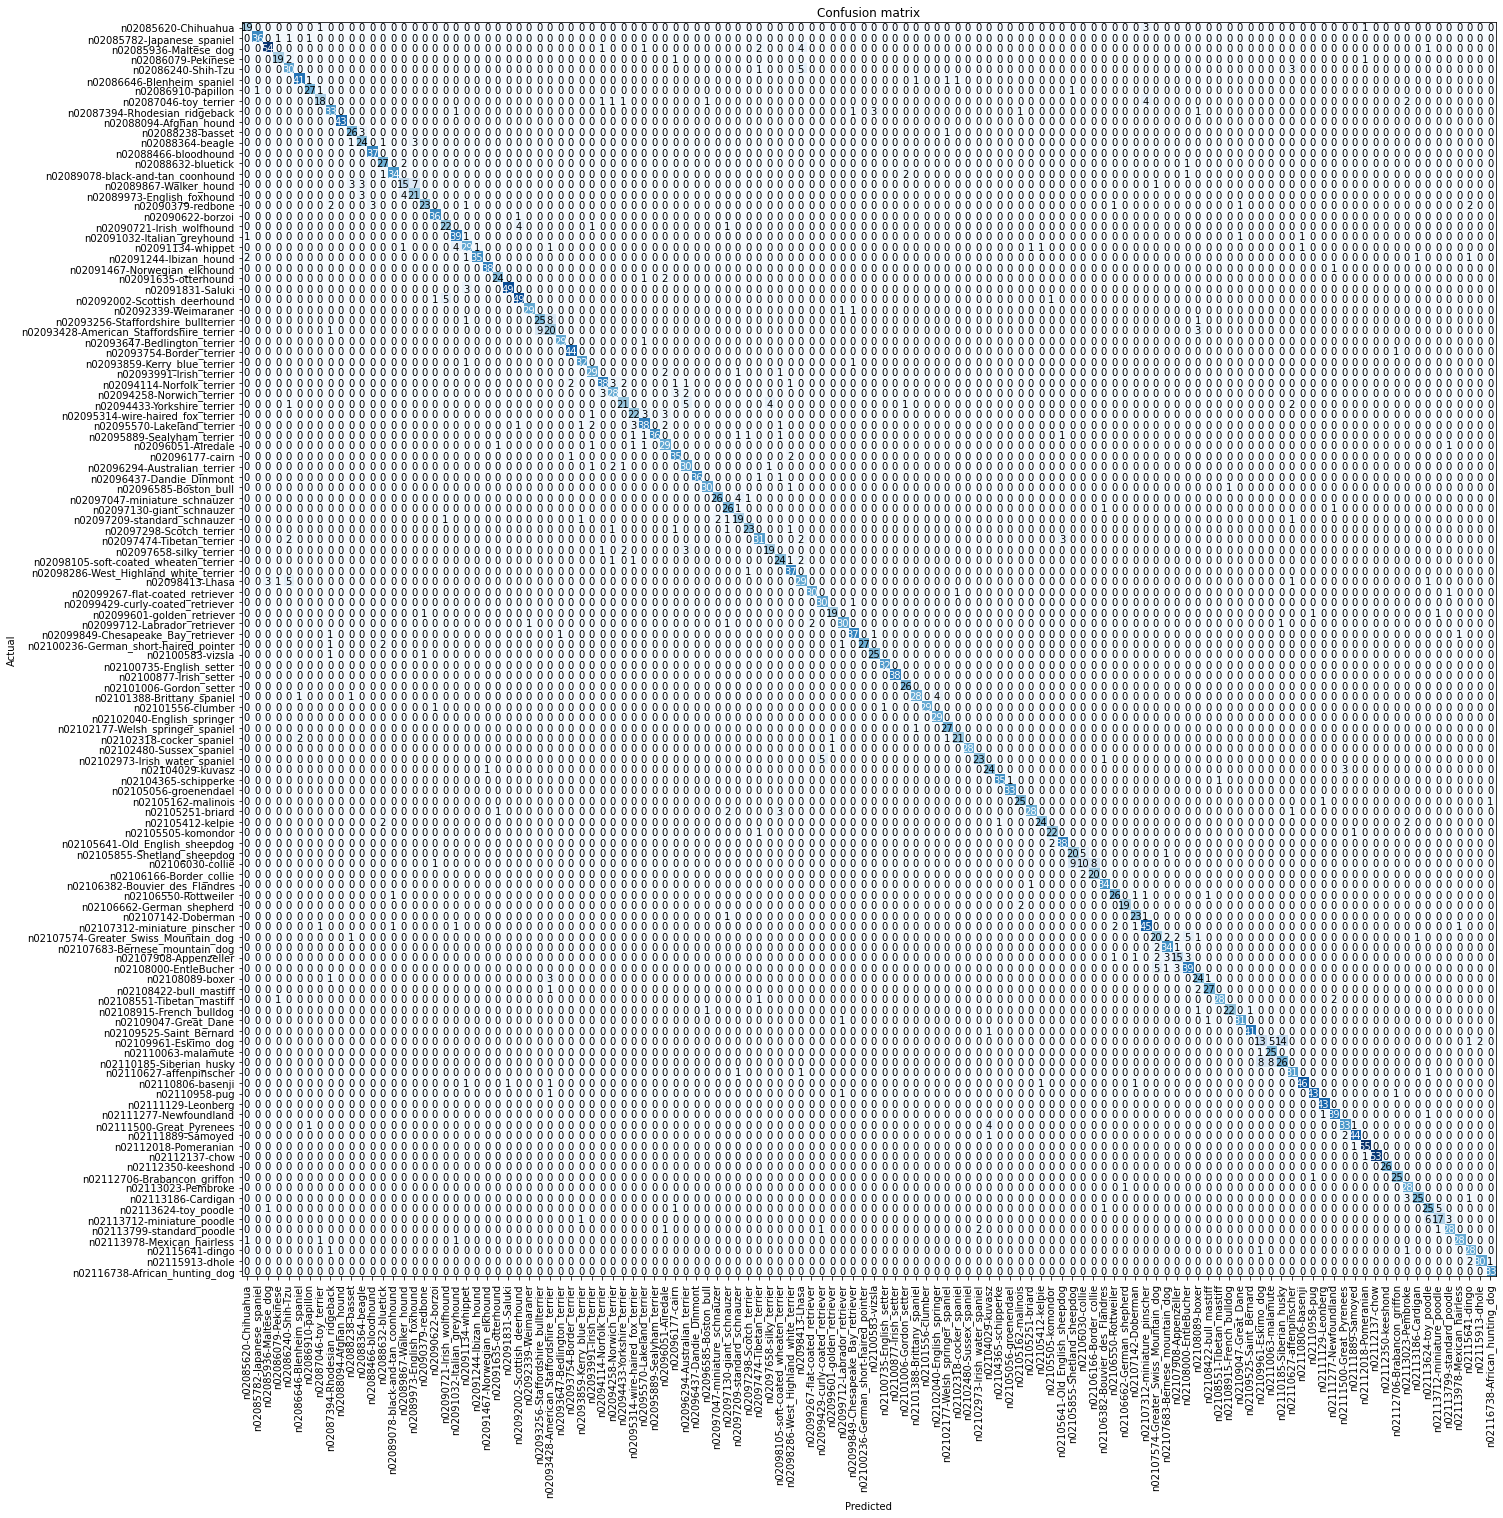

In [82]:
interpret.plot_confusion_matrix(figsize = (21,21))

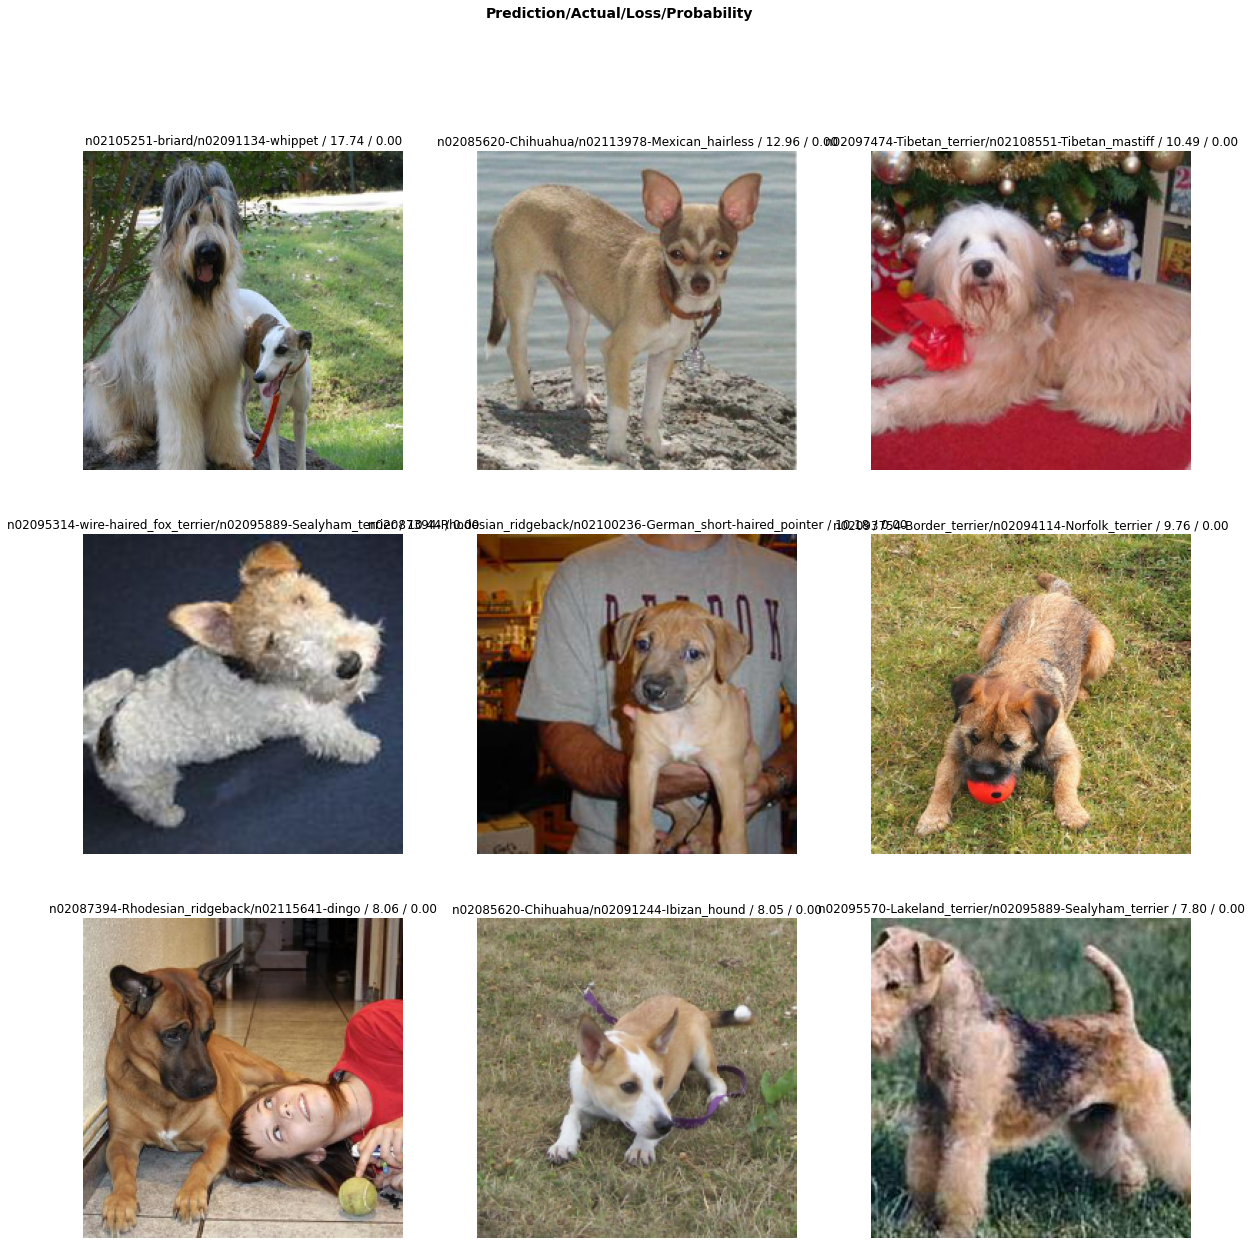

In [49]:
# Let's check out the ones that were wrong the most
interpret.plot_top_losses(9, figsize = (20,20))